In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

source: https://www.kaggle.com/fedesoriano/heart-failure-prediction/code

In [5]:
df = pd.read_csv("heart failure prediction dataset.csv",na_values=['?'])

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

In [8]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

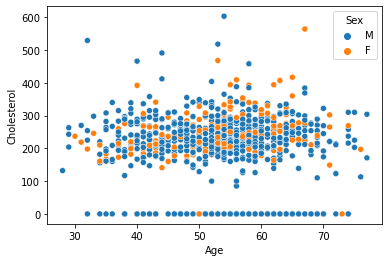

In [9]:
sns.scatterplot(data=df, x='Age',y='Cholesterol',hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='Sex'>

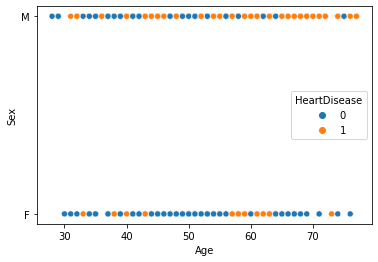

In [11]:
sns.scatterplot(data=df, x='Age',y='Sex',hue='HeartDisease')

The data is already in its puriest form i.e., there are no missing values or NaN values in the data that's why ignoring data manipulation

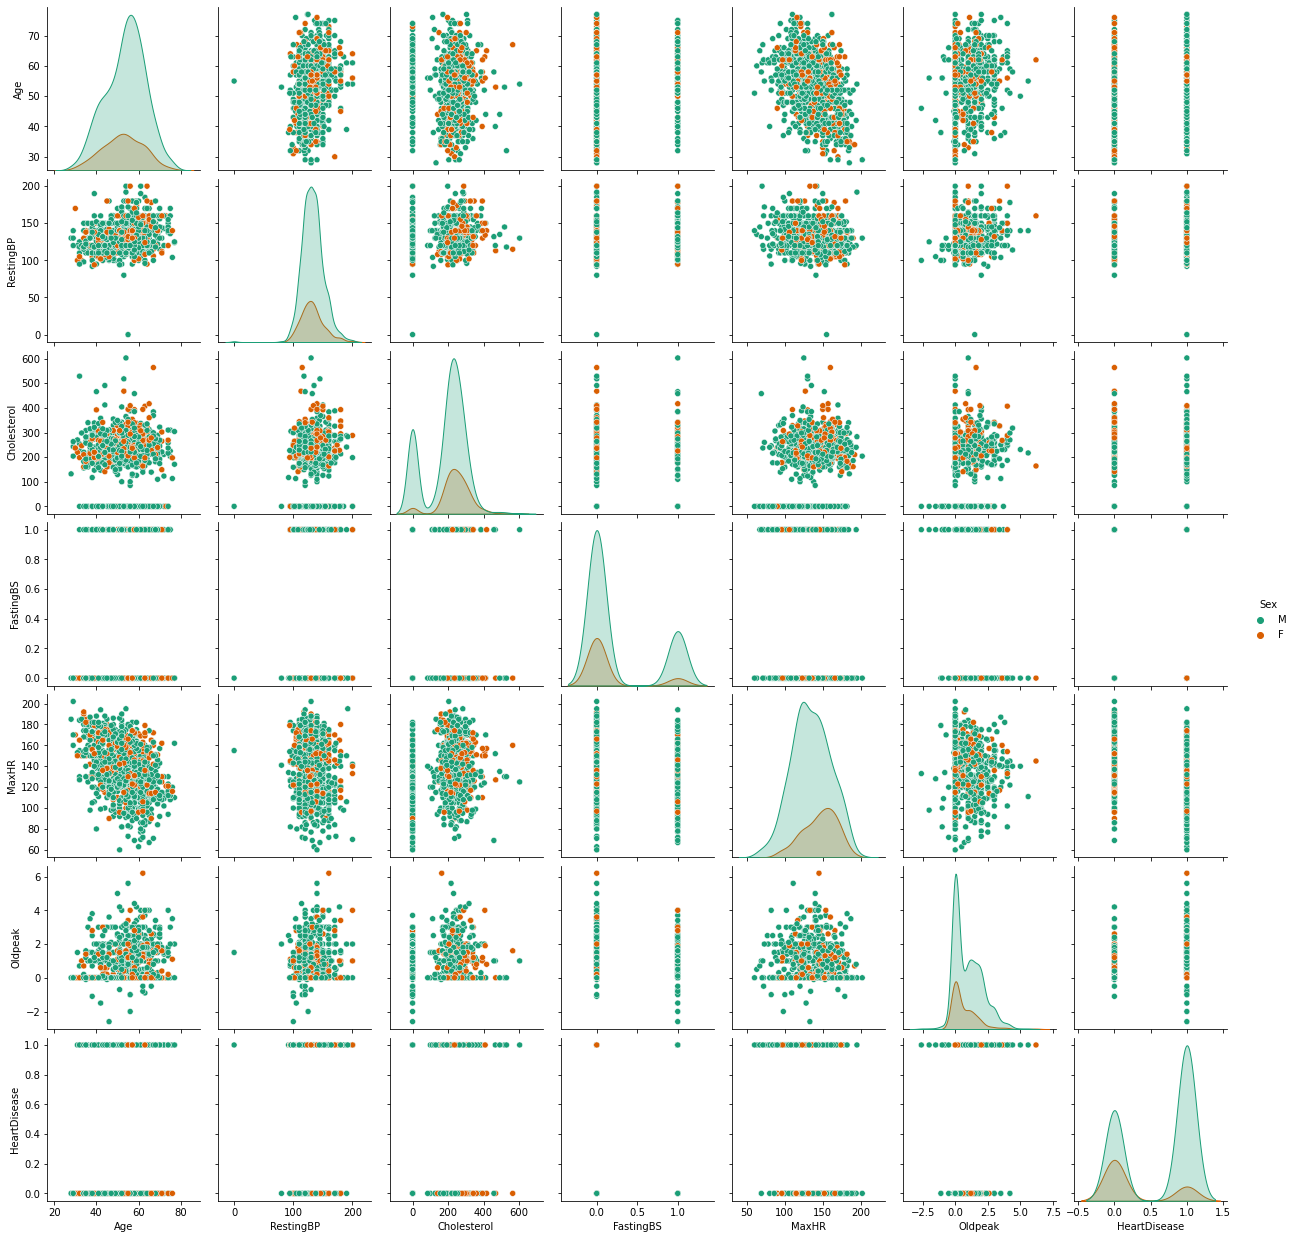

In [12]:
sns.pairplot(df,hue='Sex',palette='Dark2')

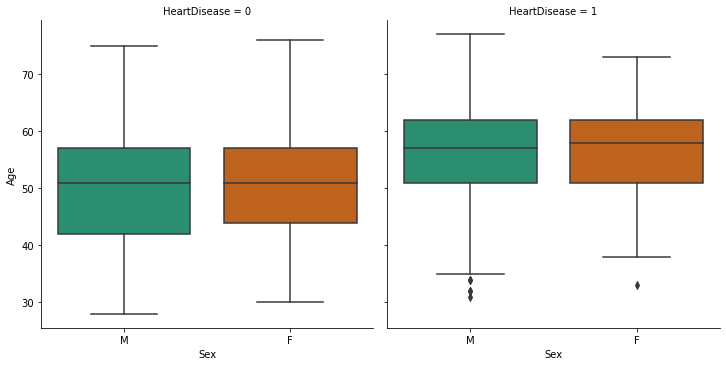

In [13]:
sns.catplot(data=df, x='Sex',y='Age',kind='box',col='HeartDisease',palette='Dark2')

<AxesSubplot:xlabel='Sex', ylabel='count'>

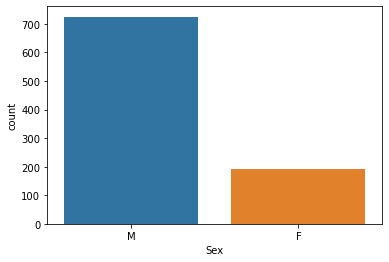

In [14]:
df['Sex'].value_counts()
sns.countplot(data=df, x='Sex')

<AxesSubplot:xlabel='Age', ylabel='count'>

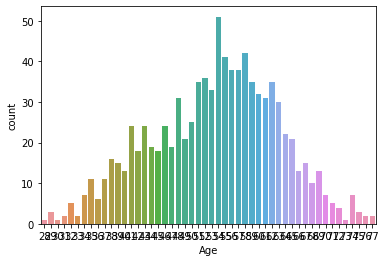

In [15]:
df["Age"].value_counts()
sns.countplot(data=df, x="Age")

get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [17]:
pd.get_dummies(df)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [18]:
pd.get_dummies(df.drop('Sex',axis=1),drop_first=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,1,0,0,0,0,0,1,0


spliting data for training and testing

In [19]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(df.drop('Sex',axis=1),drop_first=True)
y = df['Sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Creating a DecisionTreeClassifier and fit it to your training data.

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = model.predict(X_test)

Measuring the accuracy of the resulting decision tree model using test data.

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
confusion_matrix(y_test, y_pred)

array([[ 26,  31],
       [ 47, 172]])

In [30]:
print("Individual Accuracy:",model.score(X_test, y_test))
accuracy3=accuracy_score(y_test, y_pred)
report3=classification_report(y_test, y_pred) 
print(results3)
print('Decision Tree Accuracy: ',accuracy3)
print('\n')
print(report3)

Individual Accuracy: 0.717391304347826
[[ 26  31]
 [ 47 172]]
Decision Tree Accuracy:  0.717391304347826


              precision    recall  f1-score   support

           F       0.36      0.46      0.40        57
           M       0.85      0.79      0.82       219

    accuracy                           0.72       276
   macro avg       0.60      0.62      0.61       276
weighted avg       0.75      0.72      0.73       276



In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           F       0.36      0.46      0.40        57
           M       0.85      0.79      0.82       219

    accuracy                           0.72       276
   macro avg       0.60      0.62      0.61       276
weighted avg       0.75      0.72      0.73       276



Feature importance can be used to improve a predictive model. Features are shuffled n times and the model refitted to estimate the importance of it.

In [27]:
model.feature_importances_

array([0.16181407, 0.16710813, 0.25804691, 0.01739719, 0.152379  ,
       0.04935503, 0.0888573 , 0.00394698, 0.01954087, 0.00297834,
       0.01417713, 0.00508323, 0.0298752 , 0.01681052, 0.01263008])

In [32]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.161814
RestingBP,0.167108
Cholesterol,0.258047
FastingBS,0.017397
MaxHR,0.152379
Oldpeak,0.049355
HeartDisease,0.088857
ChestPainType_ATA,0.003947
ChestPainType_NAP,0.019541
ChestPainType_TA,0.002978


In [33]:
from sklearn.tree import plot_tree

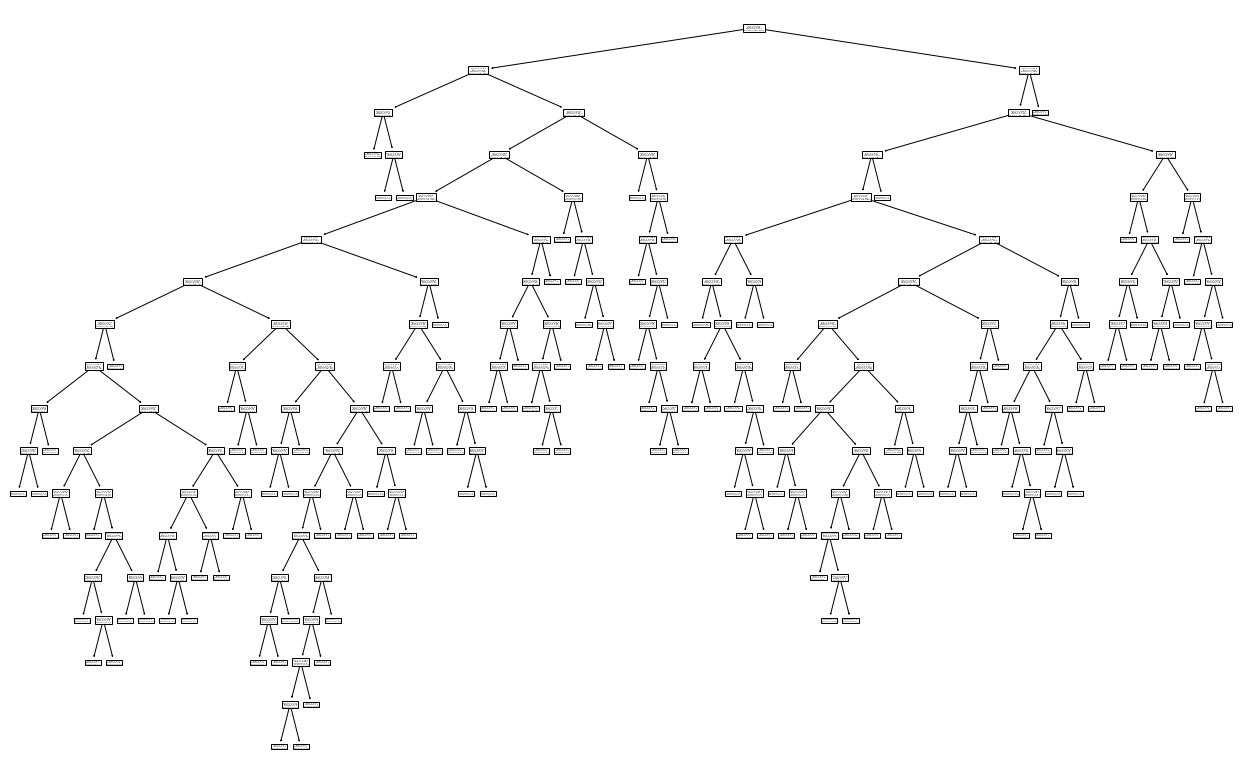

In [43]:
plt.figure(figsize=(22,14))
plot_tree(model);

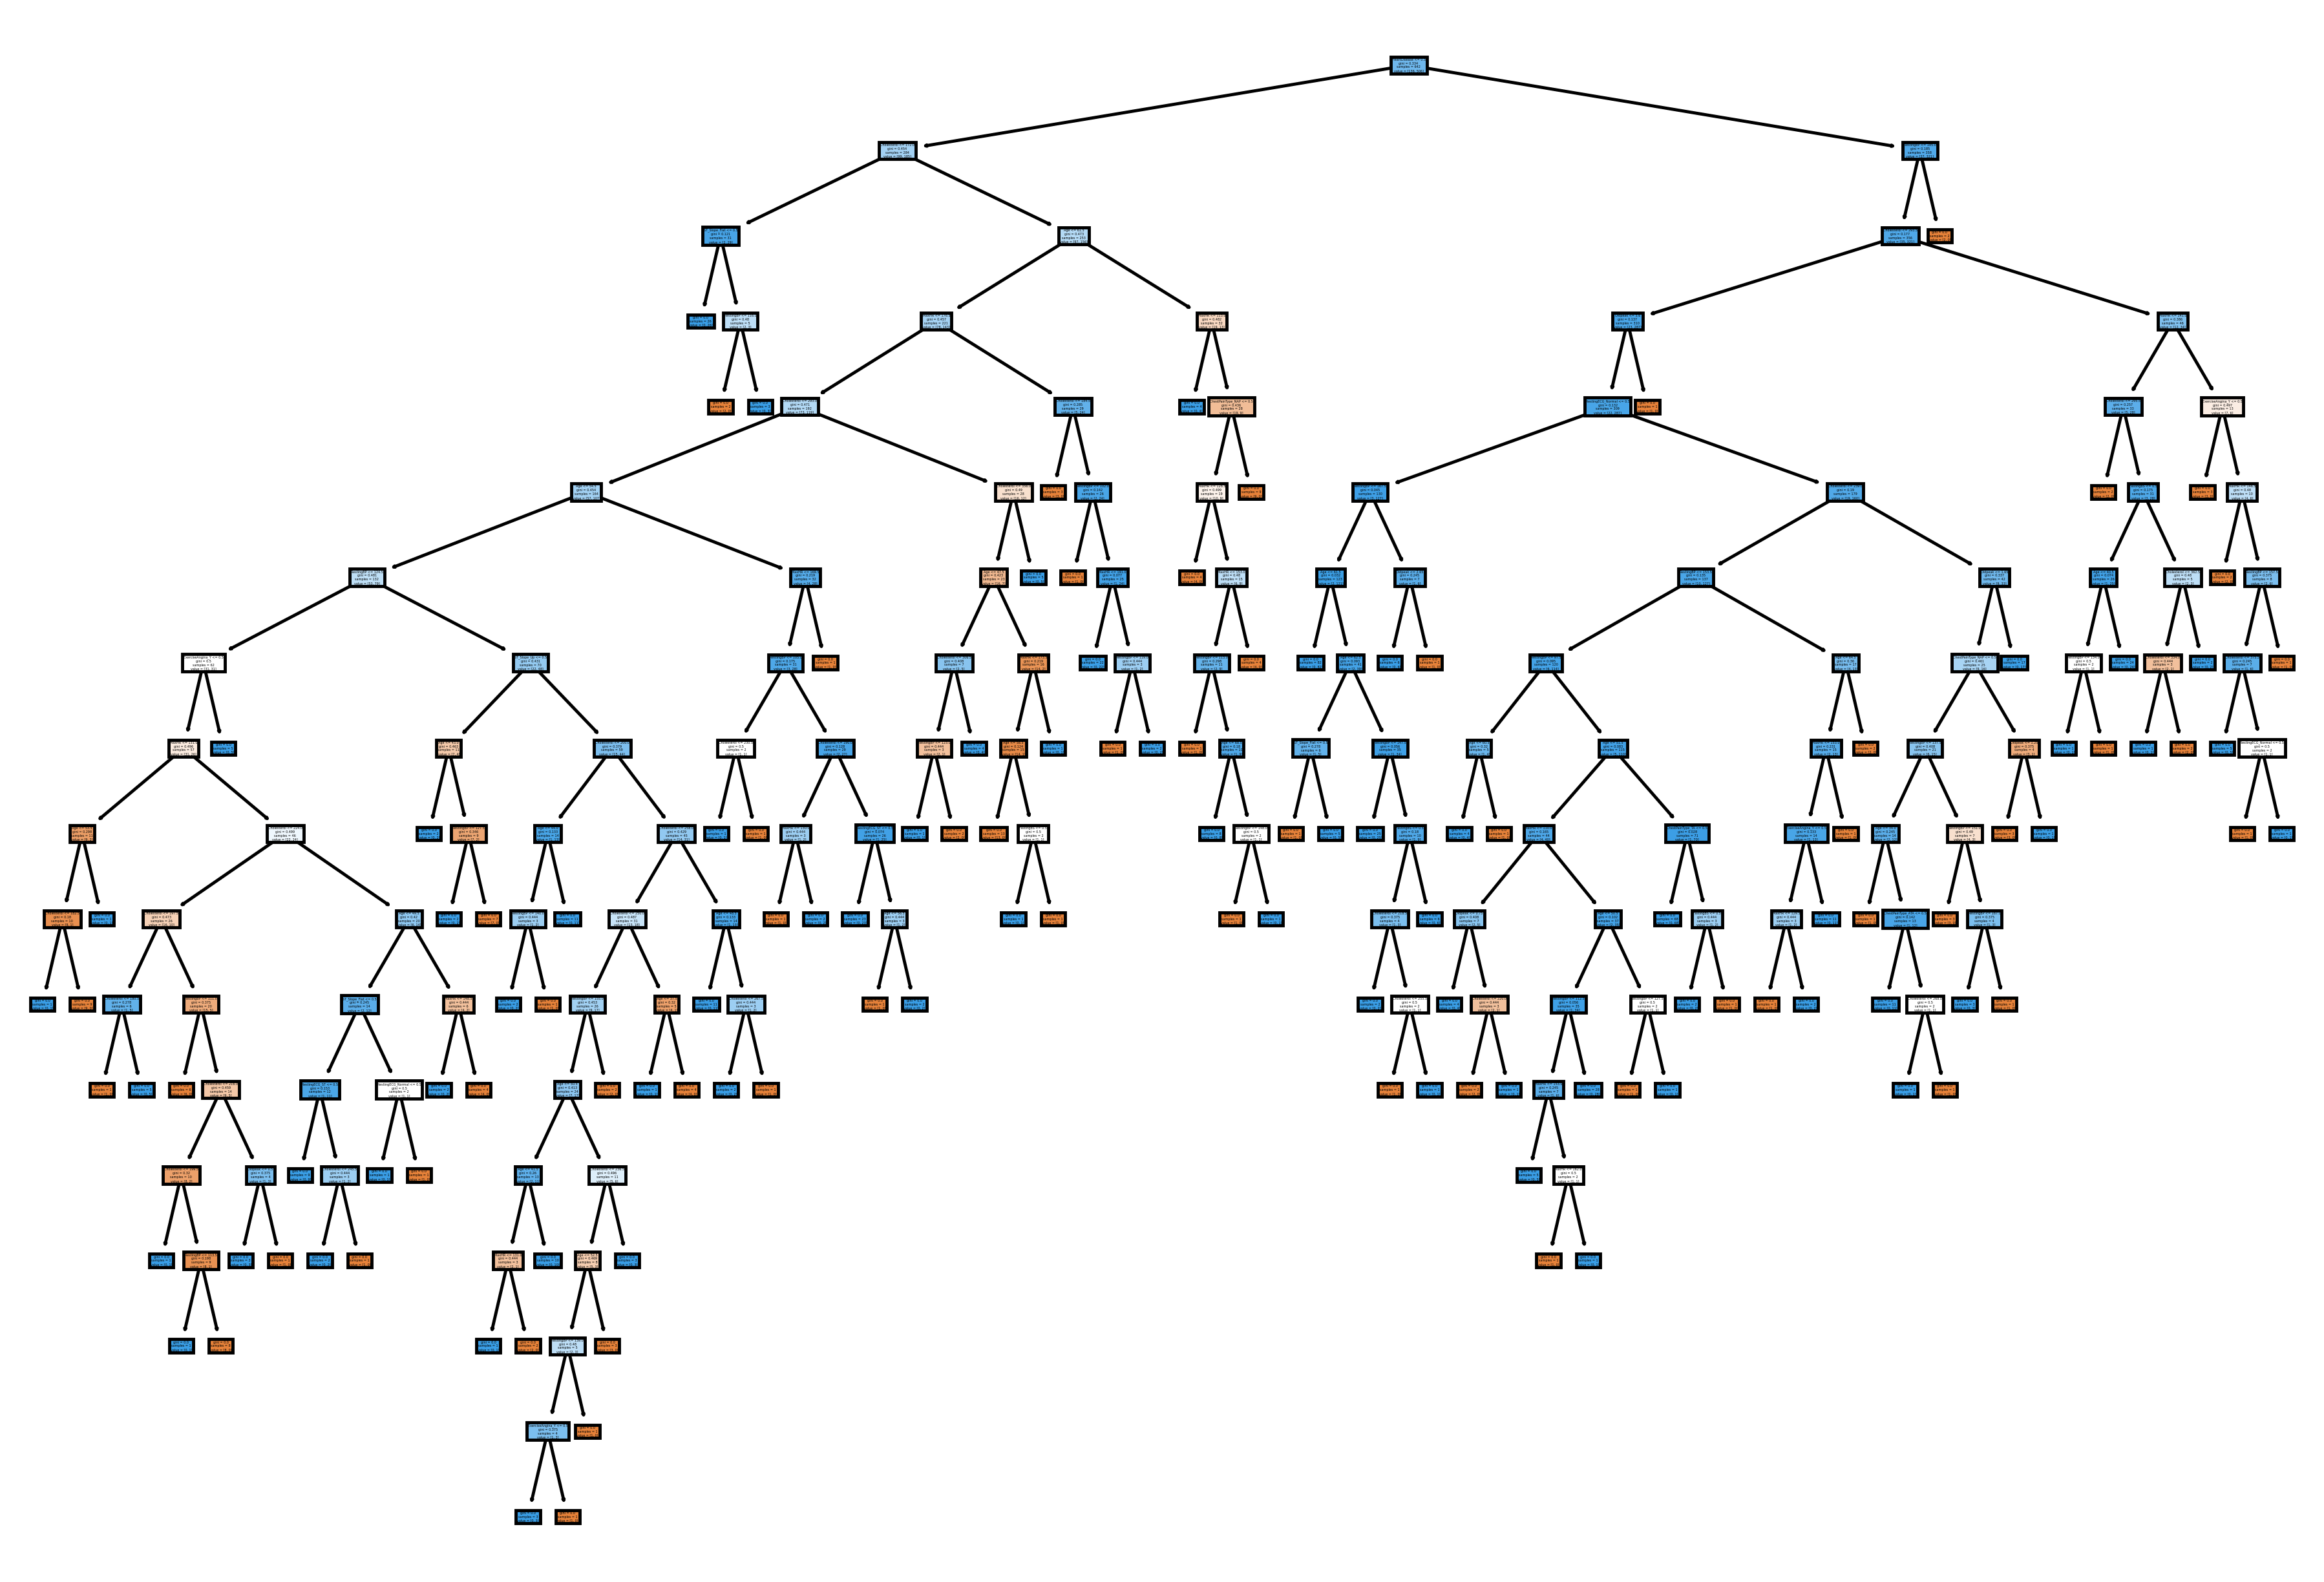

In [42]:
plt.figure(figsize=(13,9),dpi=350)
plot_tree(model,filled=True,feature_names=X.columns);

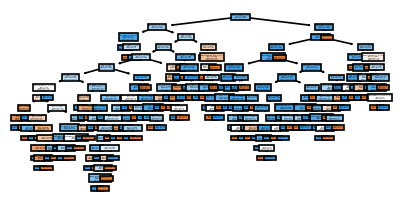

In [41]:
plt.figure(figsize=(4,2),dpi=120)
plot_tree(model,filled=True,feature_names=X.columns);

Saving a model

In [55]:
import pickle

In [56]:
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

INFO:tensorflow:Assets written to: ram://d9c2b75a-2a31-47c7-a958-595d730f1385/assets


In [57]:
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [ ]:
lr.predict(X_test)

or

In [ ]:
model.save('decisiontree.h5')